<ul>
    <li><b>Clustering</b> is a machine learning technique that uses unsupervised learning.</li>
    <li> Group unlabelled data into natural clusters </li>
    <li> Clustering is an optimization problem </li>
    <li> $variability(c) = \sum_{e \in c} distance(mean(c), e)^2$</li>
    <li> Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad. </li>
    <li>$dissimilarity(C) = \sum_{c \in C}variability(c)$</li>
    <li> Find a C that minimises dissimilarity</li>
    <li> In order for this not to end up as each point being a cluster we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters</li>
    </ul>

<ul>
    <li><b>Hieracrhical Clustering </b></li>
    <li> Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing just one item</li>
    <li>Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters</li>
    <li>Continue until all items are clustered into a single cluster of size N</li>
    <li> Agglomerative hierarchical clustering </li>
    <li> What do we mean by closest?</li>
    <li> Can get different clusters depending linkage metric we use </li>
    <li> <b>Single Linkage:</b> consider the distance between one clsuter and another cluster to be equal to the shortest distance from any member of one cluster to any member of another cluster</li>
    <li><b>Complete linkage</b>: consider the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to any member of the other cluster</li>
    <li><b>Average linkage</b>: consider the distance between one cluster and another cluster to be te average distance from any member of one cluster to any member of the other cluster</li>
    <ul>
    

<table style="width:50%">
<tr>
    <th>BOS</th>    
    <th>NY</th>
    <th>CHI</th>
    <th>DEN</th>
    <th>SF</th>
    <th>SEA</th>
</tr>
<tr>
    <th>0</th>    
    <th>206</th>
    <th>963</th>
    <th>1949</th>
    <th>3095</th>
    <th>2979</th>
</tr>
    <tr>
    <th>0</th>    
    <th>0</th>
    <th>802</th>
    <th>1771</th>
    <th>2934</th>
    <th>2815</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>966</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>808</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
</tr>

</table>

Cluster airports based on their distance.

<b>Clusters</b>
<ul>
    <li> [BOS, NY] [CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF, SEA] </li>
    <li> <b>Single</b>[BOS, NY, CHI, DEN] [SF, SEA] </li>
    <li> <b>Complete</b>[BOS, NY, CHI] [DEN, SF, SEA] </li>
</ul>

<b> Pros and cons of hierarchical clustering</b>
<ul>
    <li>Get a history of dendrograms</li>
    <li>Deterministic given a linkage metric</li>
    <li> Answer might not be optimal. Greedy algorithm. Making locally optimal decisions at each point may or may not give us a globally optimal solution</li>
    <li> Flexible</li>
    <li> Really slow, complexity $O(n^3)$. Not something you want to work with on large datasets</li>
</ul>

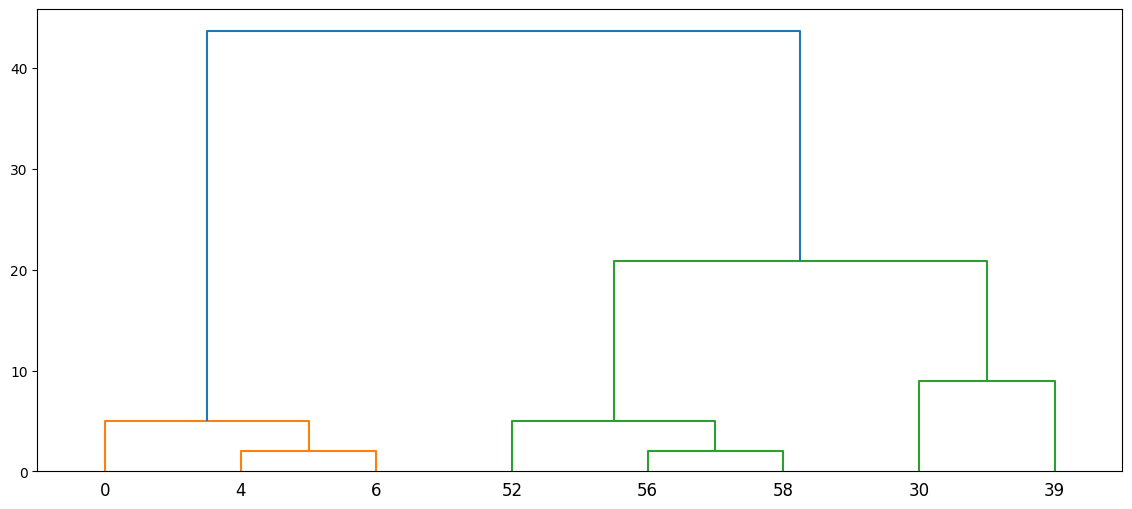

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = [0, 4, 6, 30, 39, 52, 56, 58]
Z = np.reshape(data,(len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(Z, method='average'), labels=data)


In [53]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979], 
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

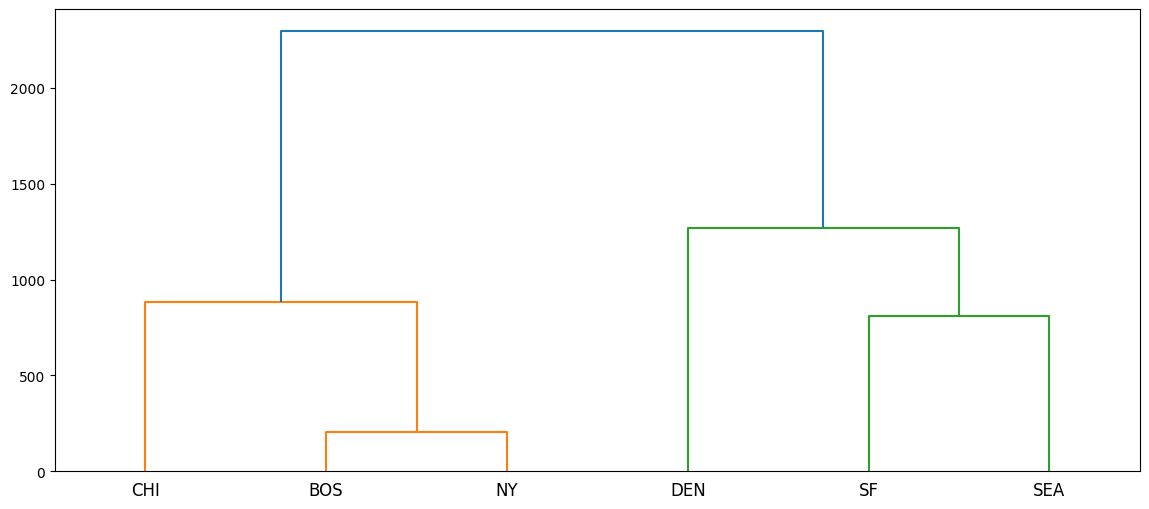

In [54]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='average'), labels=airports)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [56]:
dataset = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [57]:
points = dataset[0]

In [58]:
points


array([[-0.48428125,  6.1339592 ],
       [ 0.11528327, -4.98158692],
       [ 0.09417313, -4.05882797],
       [-7.556685  , -2.42379349],
       [ 0.59860361,  3.34704241],
       [-4.73695683, -1.23390307],
       [-1.88583355, -0.65794471],
       [-1.25918778,  8.42166447],
       [-5.46469501, -1.4677575 ],
       [-5.21118763, -0.88454091],
       [-2.39128542,  9.5902579 ],
       [-3.79577694, -3.94197151],
       [-0.55798628, -2.70088621],
       [-2.84694071, 11.70447814],
       [-5.88958899, -1.47219541],
       [-0.4497762 ,  4.58102297],
       [-6.15966811, -2.13553844],
       [-0.10009538,  8.99929345],
       [-2.15963524, -7.56230415],
       [-3.51874239, -4.48330466],
       [-1.32101631, 10.72186833],
       [ 5.19455346, -3.85790517],
       [ 1.00681205, -5.97364221],
       [-1.16539558,  7.39086886],
       [-3.25968528,  5.44630828],
       [-5.39405829,  0.12384806],
       [-3.87922543,  9.49845046],
       [-2.31431452,  9.98631399],
       [-1.92013725,

In [59]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

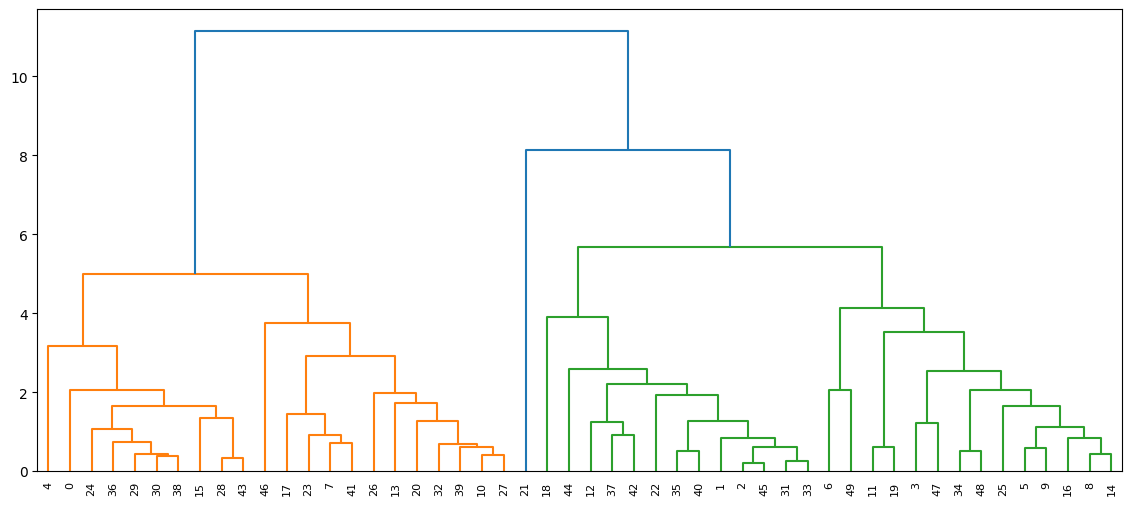

In [60]:
dendrogram = sch.dendrogram(sch.linkage(points, method='average'))

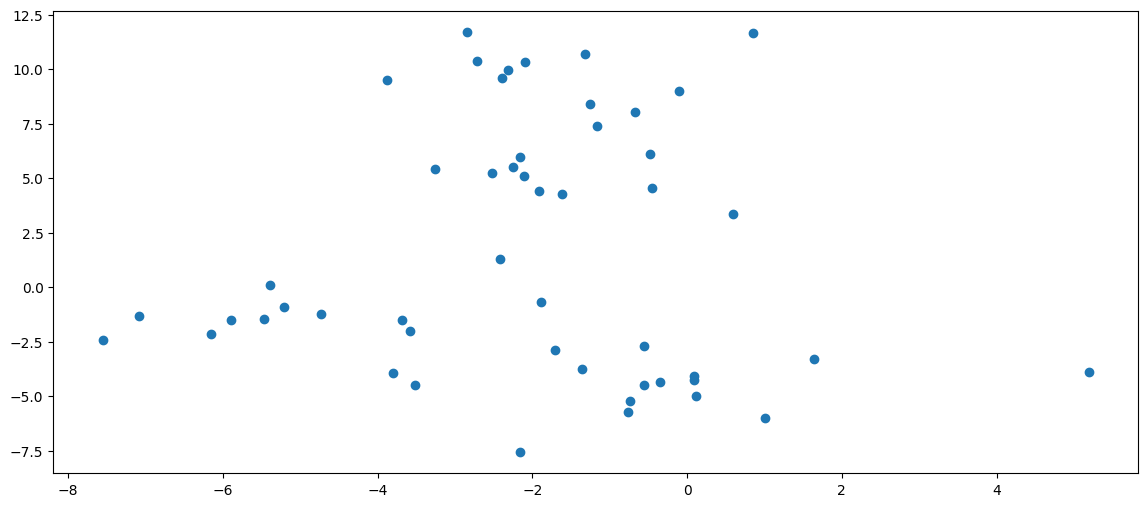

In [61]:
plt.scatter(dataset[0][:, 0], dataset[0][:,1])

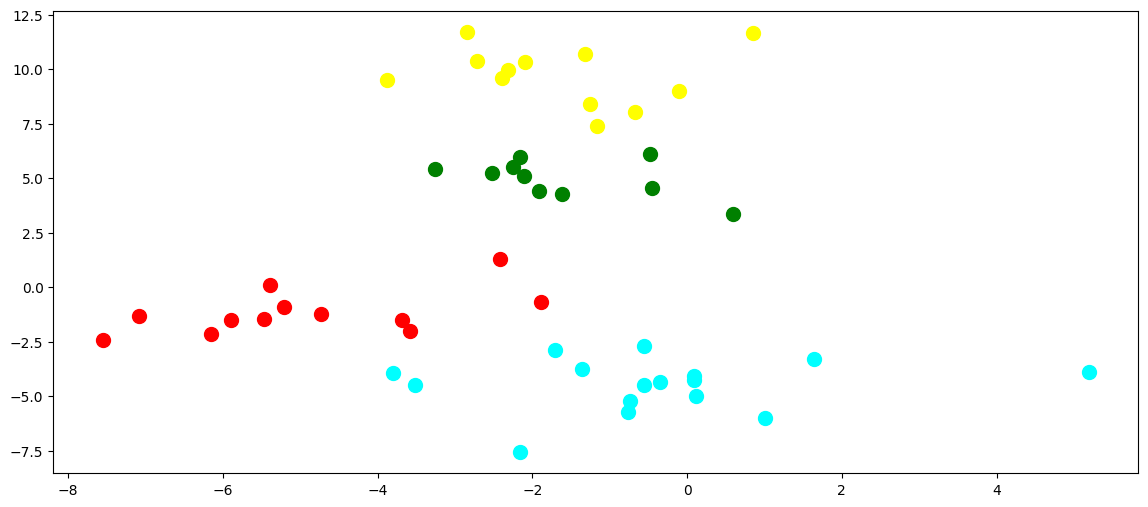

In [62]:
hc = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s=100, c='cyan')
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], s=100, c='yellow')
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], s=100, c='red')
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], s=100, c='green')

In [63]:
import pandas as pd
loan_data = pd.read_csv("loan_data3.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [64]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data), 2)

In [66]:
percent_missing

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

In [67]:
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [68]:
import seaborn as sb
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sb.boxplot(data=df, orient='v')
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')

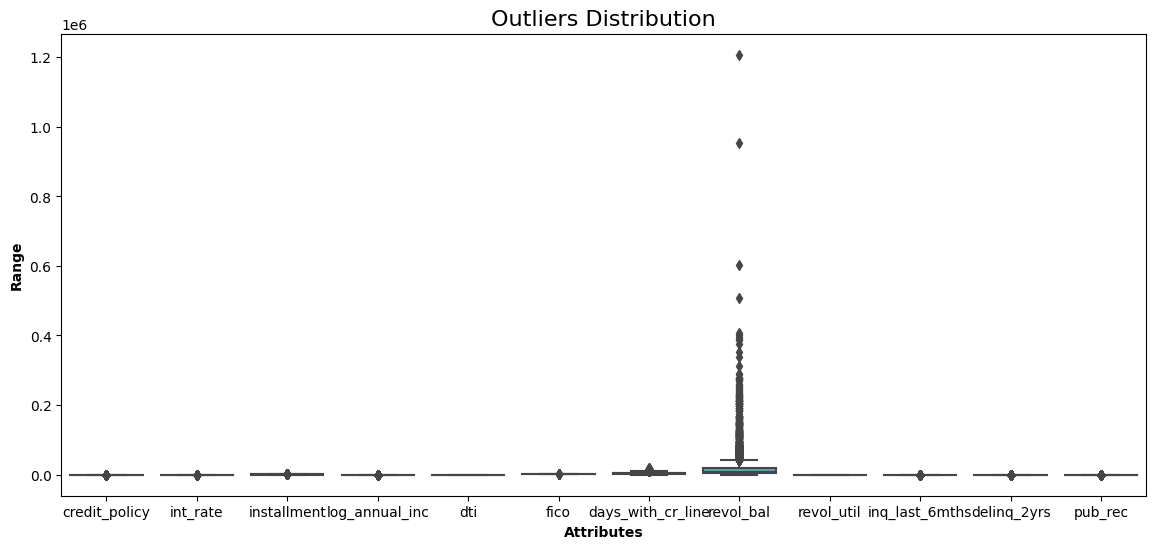

In [69]:
show_boxplot(cleaned_data)

In [70]:
def remove_outliers(data):
    df = data.copy()
    for column in list(df.columns):
        Q1 = df[str(column)].quantile(0.25)
        Q3 = df[str(column)].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[str(column)] >= lower_bound) & (df[str(column)] <= upper_bound)]
        return df

(7710, 12)

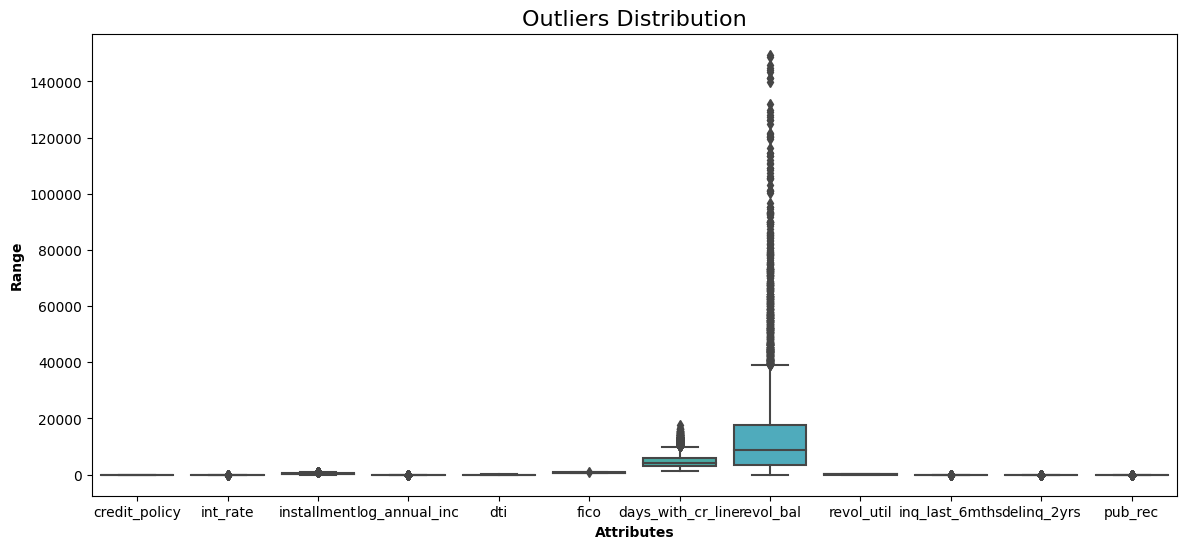

In [71]:
without_outliers = remove_outliers(cleaned_data)
show_boxplot(without_outliers)
without_outliers.shape

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(without_outliers)
scaled_data.shape
# pruned_data = scaled_data[0:5000]

(7710, 12)

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [74]:
complete_linkage = linkage(scaled_data, method='complete', metric='euclidean')
average_linkage = linkage(scaled_data, method='average', metric='euclidean')
single_linkage = linkage(scaled_data, method='single', metric='euclidean')

In [75]:
dendrogram(average_linkage)
plt.show()

KeyboardInterrupt: 

In [80]:
cluster_labels = cut_tree(average_linkage, n_clusters=2).reshape(-1, )
# pruned_data = pd.DataFrame(pruned_data)
without_outliers['cluster'] = cluster_labels
without_outliers

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,cluster
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,0
7706,1,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,0
7707,1,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,0
7708,1,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,0


<Axes: xlabel='cluster', ylabel='fico'>

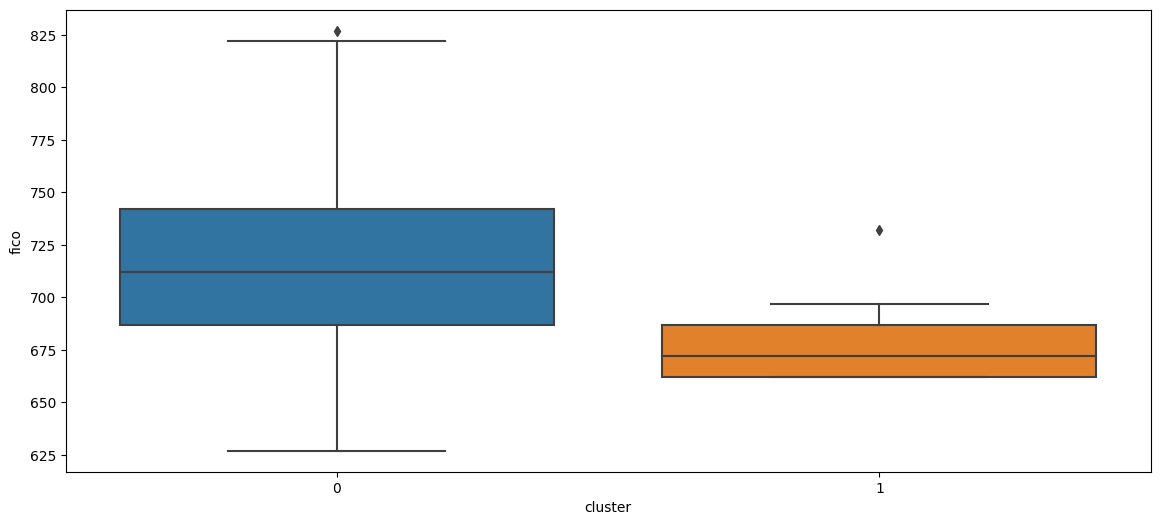

In [81]:
sb.boxplot(x='cluster', y='fico', data=without_outliers)